In [ ]:
#Identifying Profitable Film Genres for Microsoft's New Movie Studio

In [ ]:
#OVER VIEW
#the project analyzes diffrent kinds of  movies to help dtermine the popular choices amoung the most streamed movies by the majority
#we can use this anaylsis to create,hire and produce more valuble and fast selling programs for all age sets 

In [1]:
#BUSINESS PLAN
#THE BOX OFFICE MOJO MOVIES RESERCH IS TO PROVIDE  industry-specific knowledge, including the understanding of which film genres are popular and profitable in the current market
#The focus is on identifying film genres that have demonstrated consistent success at the box office, as measured 
#by high ticket sales, positive critical reception, and strong audience demand.
# Analyzing the current landscape helps understand the evolving preferences of moviegoers and identify trends 
#that may influence the success of certain genres.
#The objective is to select film genres that have a high potential for financial success, taking into account factors such as production costs, 
#marketing strategies, and audience demographics.

In [4]:
import pandas as pd
#this is the function used for data analysis library,it provides many functions and methods to expeditethe data analysisprocess.
import numpy as np
#used to perform wide variety of arithmetics operationson arrays
import gzip
#the gzip function is used to open compressed files.
import matplotlib.pyplot as plt
#this a function for data visualizationand graphical plotting
import seaborn as sns
#function for making statistcal graphics 
import re
#serches for all the instances of pattern in the given string, and replaces them.

In [8]:
with gzip.open('C:\\Users\\USER\\Downloads\\bom.movie_gross.csv.gz','rt',encoding = "utf-8")as file:
    bom_movie_g =pd.read_csv(file)
#this is the file path for the compressed data we can read the file through running this commands 

In [9]:
bom_movie_g.head()
#function for calling out the first five raws to see how the data looks like 
#it includes movie titles , the studio, domestic gross, foreighn gross and the year

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [23]:
bom_movie_g.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [10]:
bom_movie_g .info
#this function is used to provide information about the type of data you handling number of raws and columns present.

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [14]:
bom_movie_g.value_counts()

title                           studio   domestic_gross  foreign_gross  year
xXx: The Return of Xander Cage  Par.     44900000.0      301200000      2017    1
I Am Number Four                BV       55100000.0      94800000       2011    1
How to Be Single                WB (NL)  46800000.0      65500000       2016    1
How to Train Your Dragon        P/DW     217600000.0     277300000      2010    1
How to Train Your Dragon 2      Fox      177000000.0     444500000      2014    1
                                                                               ..
Source Code                     Sum.     54700000.0      92600000       2011    1
South of the Border             CLS      199000.0        70800          2010    1
Southpaw                        Wein.    52400000.0      39500000       2015    1
Southside with You              RAtt.    6300000.0       208000         2016    1
'71                             RAtt.    1300000.0       355000         2015    1
Length: 2007, dtype: 

In [ ]:
#DATA PREPARATION 
#DATA CLEANING

In [ ]:
 #MAKING COLUMN NAMES EASER TO WORK WITH BY NORMALIZING COLUMN NAMES AND DROPING UNNECESARY COLUMNS
    

In [24]:
bom_movie_g.columns = bom_movie_g.columns.str.lower().str.replace(' ', '_')
#MAKING COLUMN NAMES EASIER TO USE

In [25]:
bom_movie_g

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [26]:
bom_movie_g.shape

(3387, 5)

In [28]:
#reviewing the word count for the data available so wew ill adda a word review column using the lambda function
#which takes any argument or number but with one expression.
bom_movie_g['Review_Word_Length'] = bom_movie_g['title'].map(lambda x: len(x.split()))
bom_movie_g.head()

,title,studio,domestic_gross,foreign_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,652000000,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,8
3,Inception,WB,292600000.0,535700000,2010,1
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,3


In [29]:
#we have added one new column for reviwing word count in the data.
bom_movie_g.shape

(3387, 6)

In [30]:
bom_movie_g.duplicated().value_counts()

False    3387
dtype: int64

In [32]:
# Use keep=False to keep all duplicates and sort_values to put duplicates next to each other
bom_movie_g[bom_movie_g.duplicated(keep=False)].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year,Review_Word_Length


In [34]:
#cheking for dubplicates in our data.
bom_movie_g = bom_movie_g.drop_duplicates() 
bom_movie_g.shape#from the test we have run to remove dublicates we have no dublicates in our data since the number
#of raws and columns remains the same .

(3387, 6)

In [35]:
#re cheking for duplicates in our data.
bom_movie_g.duplicated().value_counts()

False    3387
dtype: int64

In [42]:
#next is detecting missing values using the isna() function.
bom_movie_g.isna().mean()*100

title                  0.000000
studio                 0.147623
domestic_gross         0.826690
foreign_gross         39.858282
year                   0.000000
Review_Word_Length     0.000000
dtype: float64

In [52]:
#we are going to drop the foreighn gross column due to the high number of missing values.
bom_movie_g.dropna(subset=["foreign_gross"], inplace=True)

In [54]:
bom_movie_g

,title,studio,domestic_gross,foreign_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,652000000,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,8
3,Inception,WB,292600000.0,535700000,2010,1
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,3
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,4
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,5
3309,Time Freak,Grindstone,10000.0,256000,2018,2
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9


In [53]:
bom_movie_g.isna().mean()*100

title                 0.000000
studio                0.196367
domestic_gross        1.374570
foreign_gross         0.000000
year                  0.000000
Review_Word_Length    0.000000
dtype: float64

In [55]:
df2=bom_movie_g.drop(columns="foreign_gross",inplace=True)

In [56]:
bom_movie_g

,title,studio,domestic_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,8
3,Inception,WB,292600000.0,2010,1
4,Shrek Forever After,P/DW,238700000.0,2010,3
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,2018,4
3286,The Catcher Was a Spy,IFC,725000.0,2018,5
3309,Time Freak,Grindstone,10000.0,2018,2
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,2018,9


In [58]:
#sqlite is a neccesary library
import sqlite3

In [60]:
df=pd.read_csv('C:\\Users\\USER\\Downloads\\bom.movie_gross.csv.gz')

In [61]:
#connecting the data box mojo movies to the sqlite3 database
con=sqlite3.connect('bom.movie_gross.csv.gz')

In [62]:
#creating an interface between the database and the data
df.to_sql('bom',con,index=False,if_exists='replace')

In [63]:
#exploring the data to know the data types of the columns in table 
#get the cursor
cursor = con.cursor()
#excute a query to get the data types in the columns in the tables
cursor.execute("PRAGMA table_info(bom)")
#fetch all rows from the result 
rows= cursor.fetchall()
#print the column names and data types 
for row in rows:
    print(row[1],row[2])

title TEXT
studio TEXT
domestic_gross REAL
foreign_gross TEXT
year INTEGER


In [64]:
#looking for the studio with the highest number of productions 
pd.read_sql("""SELECT studio, COUNT(*) AS studio_count
             FROM bom
             GROUP BY studio
             ORDER BY title
             DESC LIMIT 1;""",con)

,studio,studio_count
0,Magn.,136


In [66]:
# year with highest domestic gross
pd.read_sql("""SELECT domestic_gross, COUNT(*) AS gross_count
             FROM bom
             GROUP BY year
             ORDER BY year
             DESC LIMIT 1;""",con)

,domestic_gross,gross_count
0,678800000.0,308


In [ ]:
#Analysis

In [57]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


NameError: name 'box_mojo_movies_analysis' is not defined

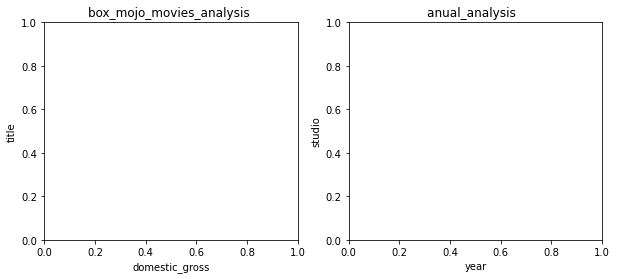

In [81]:
# Create plot
movies_fig, movies_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

movies_axes[0].set_title('box_mojo_movies_analysis')
movies_axes[0].set_ylabel('title')
movies_axes[0].set_xlabel('domestic_gross')

movies_axes[1].set_title('anual_analysis  ')
movies_axes[1].set_ylabel('studio')
movies_axes[1].set_xlabel('year')

box_mojo_movies_analysis = bom_movie_g['title'][box_mojo_movies_analysis['domestic_gross'] <10]
anual_analysis = bom_movie_g['studio'][anual_analysis['year'] >100]

movies_axes[0].hist(box_mojo_movies_analysis, bins=5)
movies_axes[1].hist(anual_analysis, bins=10)

plt.savefig("./images/stay_distributions.png", dpi=100)
plt.show()

In [72]:
import matplotlib.ticker as mtick

AttributeError: 'AxesSubplot' object has no attribute 'columns'

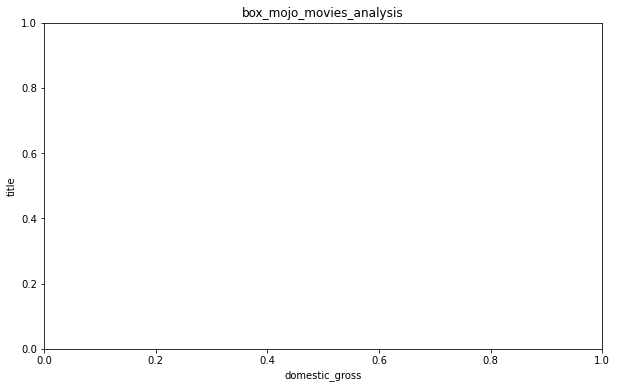

In [82]:
movies_fig, movies_ax = plt.subplots(figsize=(10, 6))

movies_ax.set_title('box_mojo_movies_analysis')
movies_ax.set_ylabel('title')
movies_ax.set_xlabel('domestic_gross')

box_mojo_movies_analysis = movies_ax.columns
title_lengths = movies_ax.loc['title']*100
domestic_gross_lengths = movies_ax.loc['domestic_gross']*100

domestic_gross_plt =movies_ax.bar(movies_fig,domestic_gross_lengths )
title_plt = movies_ax.bar(movies_fig, title_lengths, bottom = domestic_gross_lengths)

movies_ax.legend([title_plt , domestic_gross_plt], ['title', 'domestic_gross'], loc = 'upper left')
movies_ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("./images/stay_lengths_by_type.png", dpi=150)
plt.show()

In [ ]:
#seasonality intake of the movies for domestic gross and foreighn gross